## Задание
При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.  
Постройте графики количества итераций оптимизации функции ackley от значения параметра.  



In [2]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

In [3]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [4]:
result_1 = differential_evolution(ackley, bounds, strategy='best1bin',
                                popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7, seed=42, updating='immediate')
result_1

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [5]:
result_2 = differential_evolution(ackley, bounds, strategy='randtobest1exp',
                                popsize=25, tol=0.02, mutation=(1.5, 1.9), recombination=0.5, seed=42, updating='deferred')
result_2

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 38713
     nit: 772
 success: True
       x: array([0., 0.])

In [6]:
result_3 = differential_evolution(ackley, bounds, strategy='randtobest1exp',
                                  popsize=10, tol=0.005, mutation=(0.5, 1.5), recombination=0.3, seed=42, updating='immediate')
result_3

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 10043
     nit: 498
 success: True
       x: array([0., 0.])

In [8]:
result_4 = differential_evolution(ackley, bounds, strategy='randtobest1exp', 
                                    popsize=15, tol=0.005, mutation=(0.1, 0.7), recombination=1.5, seed=42, updating='deferred')
result_4

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2883
     nit: 93
 success: True
       x: array([0., 0.])

In [10]:
result_5 = differential_evolution(ackley, bounds, strategy='randtobest1exp', 
                               popsize=20, tol=0.005, mutation=(0.1, 0.5), recombination=2, seed=42, updating='deferred')
result_5

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 3423
     nit: 83
 success: True
       x: array([0., 0.])

In [11]:
result_6 = differential_evolution(ackley, bounds, strategy='randtobest1exp',
                                popsize=20, tol=0.005, mutation=(0.1, 0.3), recombination=2, seed=42, updating='deferred')
result_6

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 3703
     nit: 90
 success: True
       x: array([0., 0.])

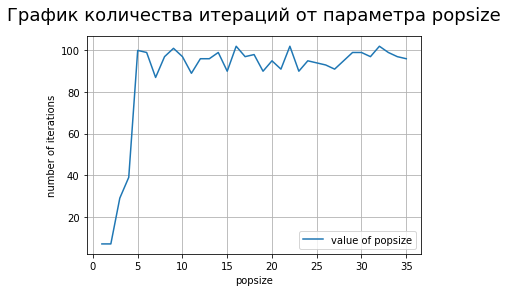

In [14]:
list_count_nit = []
popsize = [x for x in range(1, 36)]

for n in range(1, 36):
    result_X = differential_evolution(ackley, bounds, strategy='best1bin',
                          popsize=n, tol=0.01, mutation=(0.5, 1), recombination=0.7, seed=42, updating='immediate')
    list_count_nit.append(result_X.nit)
    
plt.title('График количества итераций от параметра popsize', fontdict={'fontsize':18}, pad=16)
plt.plot(popsize, list_count_nit, label = 'value of popsize' )
plt.grid(True)
plt.xlabel("popsize")
plt.ylabel("number of iterations")
plt.legend()
plt.show()

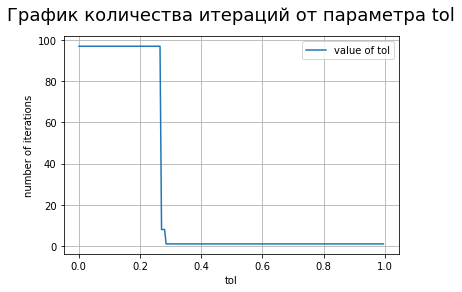

In [15]:
list_count_nit = []
tol = [x for x in np.arange(0.0005, 1.0, 0.005)]

for n in np.arange(0.0005, 1.0, 0.005):
    result_X = differential_evolution(ackley, bounds, strategy='best1bin',
       popsize=10, tol=n, mutation=(0.5, 1), recombination=0.7, seed=42, updating='immediate')
    list_count_nit.append(result_X.nit)

plt.title('График количества итераций от параметра tol', fontdict={'fontsize':18}, pad=16)
plt.plot(tol, list_count_nit, label = 'value of tol' )
plt.grid(True)
plt.xlabel("tol")
plt.ylabel("number of iterations")
plt.legend()
plt.show()

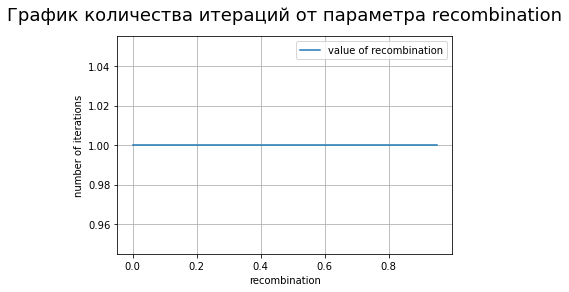

In [20]:
list_count_nit = []
recombination = [x for x in np.arange(0., 1., 0.05)]

for n in np.arange(0., 1., 0.05):
    result_X = differential_evolution(ackley, bounds, strategy='best1bin', 
                                      popsize=10, tol=0.4, mutation=(0.5, 1), recombination=n, seed=42, updating='immediate')
    list_count_nit.append(result_X.nit)

plt.title('График количества итераций от параметра recombination', fontdict={'fontsize':18}, pad=16) 
plt.plot(recombination, list_count_nit, label = 'value of recombination' )
plt.grid(True)
plt.xlabel("recombination")
plt.ylabel("number of iterations")
plt.legend()
plt.show()

## Дополнительное задание
Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.
   

In [22]:
# popsize = [x for x in range(1, 36)]\n",
# tol_list = [x for x in np.arange(0.0005, 1.0, 0.005)]\n",
# recombination = [x for x in np.arange(0., 1., 0.05)] \n",
updating_list = ['immediate', 'deferred']
strategy_list = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 
                 'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']

In [23]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

In [25]:
params = {}
nit = 100

for popsize in range(1, 36):
    for tol in np.arange(0.0005, 1.0, 0.005):
        for recombination in np.arange(0., 1., 0.05):
            for updating in updating_list:
                for strategy in strategy_list:
                    result_X = differential_evolution(ackley, bounds, strategy = strategy, popsize = popsize, 
                                                      tol = tol, mutation = (0.1, 1.9), recombination = recombination, seed = 42, updating = updating)
                    n = int(result_X.nit)
                    if n < nit:
                        nit = n
                        params['nit'] = n
                        params['popsize'] = popsize
                        params['tol'] = tol
                        params['recombination'] = recombination
                        params['updating'] = updating
                        params['strategy'] = strategy
                    else:
                        continue


ValueError: not enough values to unpack (expected 5, got 4)

# Вопросы:

1. Какие пути контроля глобалоного оптимума функции Ackley ?
   - как это осуществляется ? если можно пример или статью ?
2. Реализовать путем вложенных циклов доп. часть задания не удалось, буду благодарен за разбор этой части

Спасибо